# Task 2.4 - Seaborn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
# Import data with more efficient data types

df = pd.read_csv(
    '2 Data/Prepped Data/nyc_data.csv',
    index_col=0,
    dtype={
        'ride_id': str,
        'rideable_type': 'category',
        'start_station_name': 'category',
        'start_station_id': 'category',
        'end_station_name': 'category',
        'end_station_id': 'category',
        'member_casual': 'category',
        'start_lat': np.float32,
        'start_lng': np.float32,
        'end_lat': np.float32,
        'end_lng': np.float32,
        'avgTemp': np.float32
    },
    parse_dates=['started_at', 'ended_at', 'date'],
    low_memory=False
)

In [3]:
df.dtypes

rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
start_station_id            category
end_station_name            category
end_station_id              category
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual               category
date                  datetime64[ns]
avgTemp                      float32
dtype: object

In [4]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
ride_id,,,,,,,,,,,,,,
9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663658,-73.963013,40.668133,-73.973640,casual,2022-08-27,27.799999
2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717796,-73.993164,40.729538,-73.984268,casual,2022-08-20,27.900000
20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735355,-74.004829,40.721699,-74.002380,member,2022-08-31,25.600000
3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.10,40.744221,-73.971214,40.764397,-73.973717,member,2022-08-02,26.400000
8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982117,40.730312,-73.980469,member,2022-08-25,28.100000


## Create bar chart of top 20 starting station frequencies

In [5]:
# Set theme

sns.set_style('dark')

In [6]:
# Create 'value' column

df['value'] = 1

In [7]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [8]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,21526
1,1 Ave & E 16 St,67349
2,1 Ave & E 18 St,70854
3,1 Ave & E 30 St,45412
4,1 Ave & E 39 St,52373
...,...,...
1840,Wyckoff St & 3 Ave,250
1841,Wyckoff St & Nevins St,11527
1842,Wythe Ave & Metropolitan Ave,66468
1843,Yankee Ferry Terminal,12913


In [9]:
top20 = df_t.nlargest(20, 'value')

In [10]:
top20

,start_station_name,value
1667,W 21 St & 6 Ave,129016
1800,West St & Chambers St,123289
512,Broadway & W 58 St,114293
291,6 Ave & W 33 St,106440
8,1 Ave & E 68 St,104856
478,Broadway & E 14 St,98862
502,Broadway & W 25 St,98422
1590,University Pl & E 14 St,97120
480,Broadway & E 21 St,95691
1683,W 31 St & 7 Ave,94208


/Users/mainframe/Documents/GitHub/citibike_nyc/venv_citibike/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


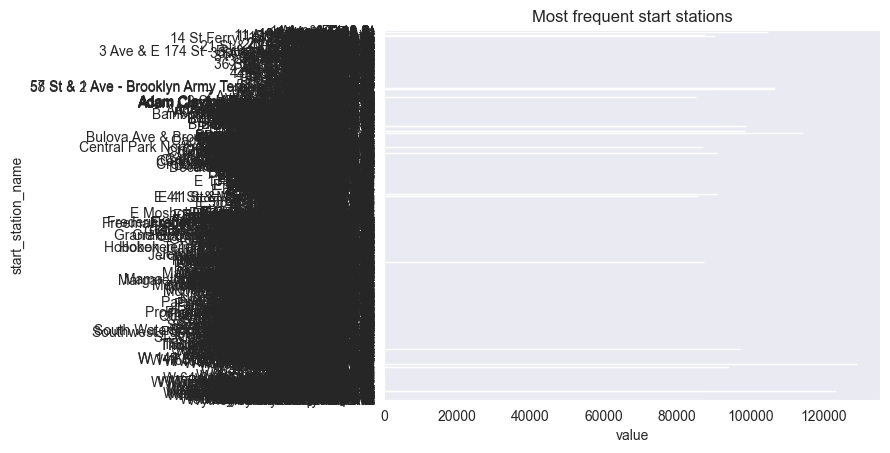

In [11]:
# Plot bar chart of most frequent start stations

sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette = ("BuGn_r"))
plt.title("Most frequent start stations")
plt.show()

In [12]:
# Inspect 'start_station_name' column for hidden characters

top20['start_station_name'].apply(lambda x: repr(x))

1667             'W 21 St & 6 Ave'
1800       'West St & Chambers St'
512           'Broadway & W 58 St'
291              '6 Ave & W 33 St'
8                '1 Ave & E 68 St'
478           'Broadway & E 14 St'
502           'Broadway & W 25 St'
1590     'University Pl & E 14 St'
480           'Broadway & E 21 St'
1683             'W 31 St & 7 Ave'
819              'E 33 St & 1 Ave'
613     'Cleveland Pl & Spring St'
30              '12 Ave & W 40 St'
292              '6 Ave & W 34 St'
1801        'West St & Liberty St'
24              '11 Ave & W 41 St'
1158       'Lafayette St & E 8 St'
581       'Central Park S & 6 Ave'
827           'E 40 St & Park Ave'
335              '8 Ave & W 33 St'
Name: start_station_name, dtype: category
Categories (1845, object): [''1 Ave & E 110 St'', ''1 Ave & E 16 St'', ''1 Ave & E 18 St'', ''1 Ave & E 30 St'', ..., ''Wyckoff St & Nevins St'', ''Wythe Ave & Metropolitan Ave'', ''Yankee Ferry Terminal'', ''York St & Marin Blvd'']

In [13]:
# Remove unnecessary quotes

top20['start_station_name'] = top20['start_station_name'].str.replace(r"^''|''$", '', regex=True)

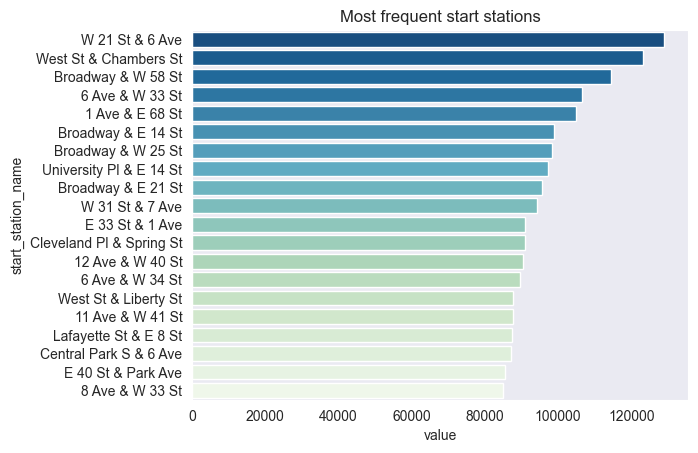

In [15]:
# Plot bar chart of most frequent start stations

sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette = ("GnBu_r"))
plt.title("Most frequent start stations")
plt.show()

In [16]:
sns.reset_orig()

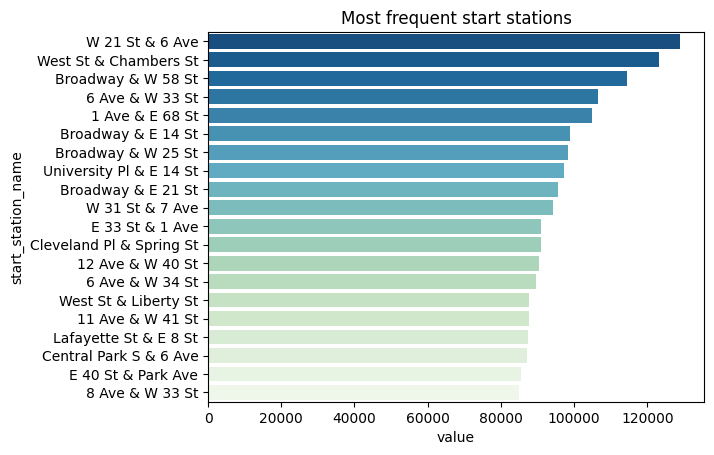

In [17]:
# Plot bar chart of most frequent start stations

sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette = ("GnBu_r"))
plt.title("Most frequent start stations")
plt.show()

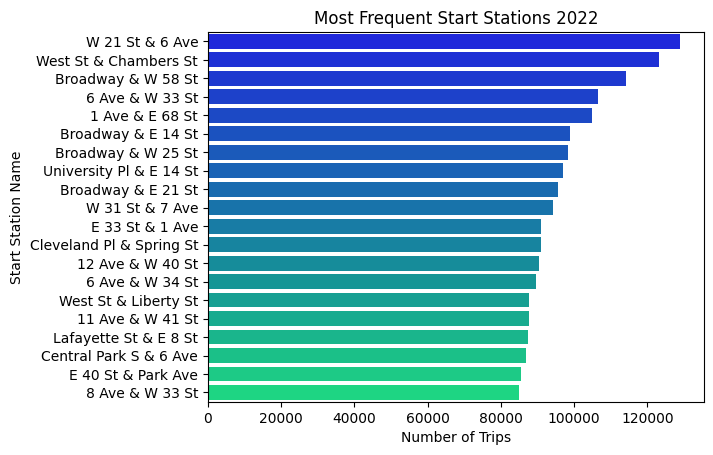

In [20]:
# Plot bar chart of most frequent start stations

sns.barplot(data=top20, x='value', y='start_station_name', palette="winter")
plt.title("Most Frequent Start Stations 2022")
plt.ylabel("Start Station Name")  # Customize y-axis label
plt.xlabel("Number of Trips")  # Customize x-axis label
plt.show()

## Dual-axis line plot

In [21]:
# Import weather dataframe

df_weather = pd.read_csv('2 Data/Prepped Data/nyc_weather.csv', index_col = 0, parse_dates = ['date'])

In [22]:
df_weather.head()

,avgTemp
date,
2022-01-01,11.6
2022-01-02,11.4
2022-01-03,1.4
2022-01-04,-2.7
2022-01-05,3.2


In [23]:
df_weather.dtypes

avgTemp    float64
dtype: object

In [24]:
df_weather.columns

Index(['avgTemp'], dtype='object')

In [25]:
print(type(df_weather.index))
print(df_weather.index.dtype)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
datetime64[ns]


In [26]:
# Extract the date from the datetime

df['date'] = df['started_at'].dt.date

In [27]:
# Reset index

df_reset = df.reset_index()

In [28]:
# Count trips per day

daily_trip_count = df_reset.groupby('date')['ride_id'].count().reset_index()

In [29]:
# Rename column for clarity

daily_trip_count.rename(columns={'ride_id': 'trip_count'}, inplace=True)

In [30]:
daily_trip_count.head()

,date,trip_count
0,2022-01-01,21020
1,2022-01-02,44257
2,2022-01-03,34021
3,2022-01-04,37776
4,2022-01-05,35144


In [31]:
# Ensure dtypes match for merge

daily_trip_count['date'] = pd.to_datetime(daily_trip_count['date'])

In [32]:
# Merge with weather data

df_final = pd.merge(df_weather, daily_trip_count, on = 'date', how = 'left')

In [33]:
df_final.head()

,date,avgTemp,trip_count
0,2022-01-01,11.6,21020
1,2022-01-02,11.4,44257
2,2022-01-03,1.4,34021
3,2022-01-04,-2.7,37776
4,2022-01-05,3.2,35144


In [35]:
sns.set_style('whitegrid')

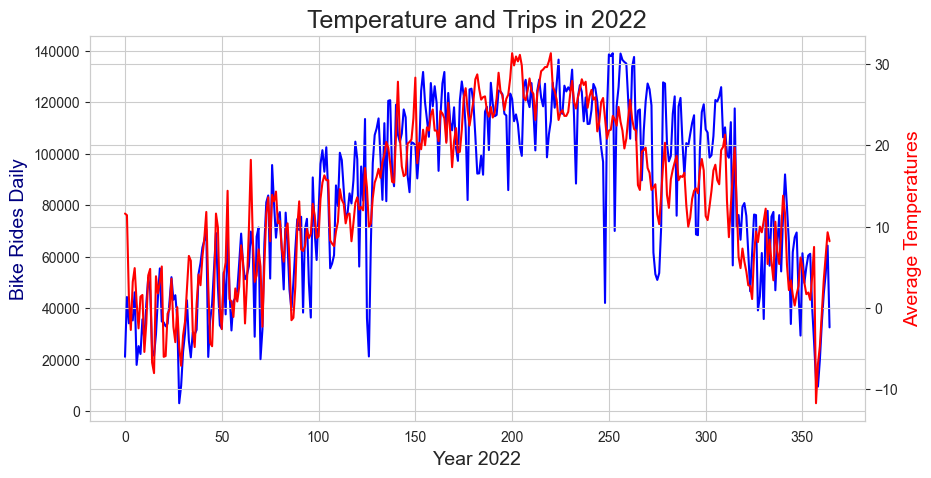

In [36]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_final['trip_count'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike Rides Daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_final['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average Temperatures", color = "red",fontsize=14)
plt.title('Temperature and Trips in 2022', fontsize = 18)
plt.show()

In [37]:
sns.reset_orig()

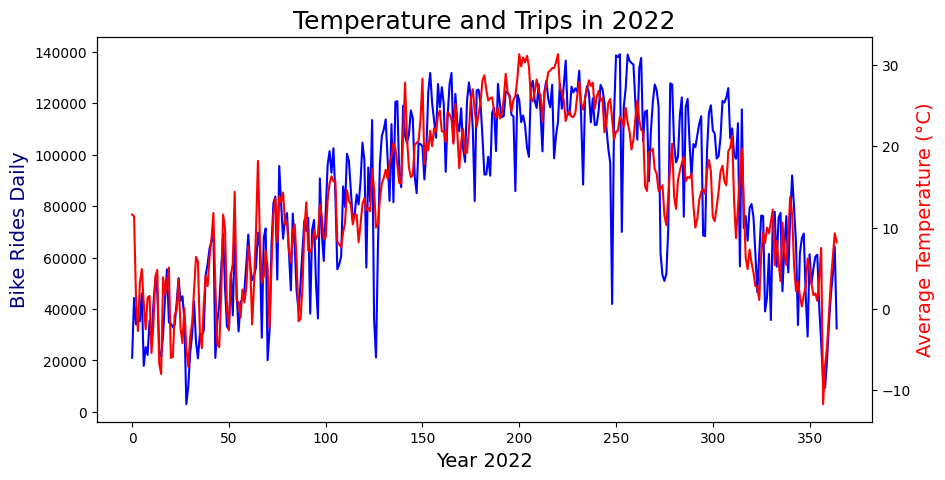

In [39]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_final['trip_count'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike Rides Daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_final['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average Temperature (°C)", color = "red",fontsize=14)
plt.title('Temperature and Trips in 2022', fontsize = 18)
plt.show()

## Box plot

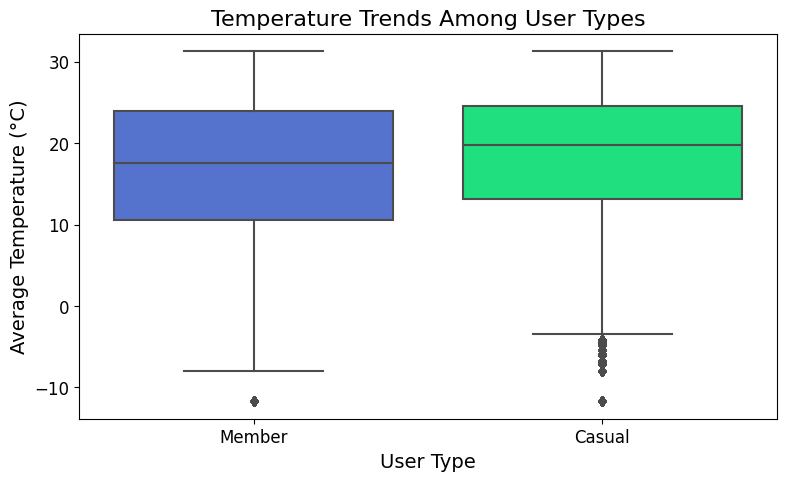

In [44]:
# Create box plot

plt.figure(figsize = (9, 5))
sns.boxplot(x = 'member_casual', y = 'avgTemp', data=df, 
            palette = {'member': 'royalblue', 'casual': 'springgreen'},
            order = ['member', 'casual'])
plt.title('Temperature Trends Among User Types', fontsize = 16)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Average Temperature (°C)', fontsize = 14)
plt.xticks([0, 1], ['Member', 'Casual'], fontsize = 12)  # Capitalize labels
plt.yticks(fontsize = 12)
plt.show()

#### This box plot identifies the average temperatures encountered by members and casual riders. The box represents the interquartile range (IQR), which encompasses the middle 50% of the data, while the line inside the box indicates the median temperature. The whiskers extend to show the range of temperatures within 1.5 times the IQR, and any points beyond the whiskers are considered outliers. Notable variations between members and casuals may suggest how weather influences their riding behavior, with members typically riding in a wider range of temperatures.

## Facet grid

In [45]:
# Check the rideable_type column

df['rideable_type'].value_counts()

classic_bike     18732275
electric_bike    11993619
docked_bike          7757
Name: rideable_type, dtype: int64

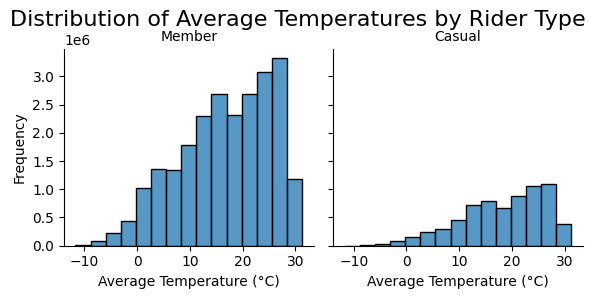

In [52]:
# Create a facet grid

grid = sns.FacetGrid(df, col = "member_casual", col_order = ["Member", "Casual"])
grid.map(sns.histplot, "avgTemp", bins = 15)
grid.fig.suptitle('Distribution of Average Temperatures by Rider Type', fontsize = 16)
grid.fig.subplots_adjust(top = 0.85)
grid.set_axis_labels('Average Temperature (°C)', 'Frequency')
grid.set_titles('{col_name}')
plt.show()

#### This facet grid displays the distribution of average temperatures during rides of members and casual riders. One can see the differences in riding behavior across temperature ranges by comparing the two histograms. Here, it's apparent that weather may be less of a factor for the member group, which makes sense as those riders have apparently already bought into a subscription.